## Image Sharpness Map Generator

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def create_sharpness_heatmap(image_path, colormap='JET', alpha=0.5):
    """
    Generates and displays a heatmap that highlights sharp vs blurry regions.
    Args:
        image_path (str): Path to input image.
        colormap (str): OpenCV colormap name (e.g., 'JET', 'HOT', 'TURBO').
        alpha (float): Blend ratio for overlay visualization (0 = only image, 1 = only heatmap).
    """

    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        print(f"Current working directory: {os.getcwd()}")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Compute Laplacian for sharpness estimation
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    sharpness_map = np.abs(laplacian)

    # Normalize the sharpness map for display
    sharpness_norm = cv2.normalize(sharpness_map, None, 0, 255, cv2.NORM_MINMAX)
    sharpness_norm = sharpness_norm.astype(np.uint8)

    # Convert normalized map to heatmap style
    colormap_code = getattr(cv2, f'COLORMAP_{colormap.upper()}', cv2.COLORMAP_JET)
    heatmap = cv2.applyColorMap(sharpness_norm, colormap_code)

    # Overlay heatmap on original image
    overlay = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    # Displaying all outputs side by side
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
    plt.title('Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB))
    plt.title('Sharpness Heatmap')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title('Overlay: Heatmap + Original')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    #Computing a global sharpness score
    variance = np.var(laplacian)
    print(f"Global Sharpness Variance (higher = sharper): {variance:.2f}")
    return sharpness_norm, heatmap, overlay


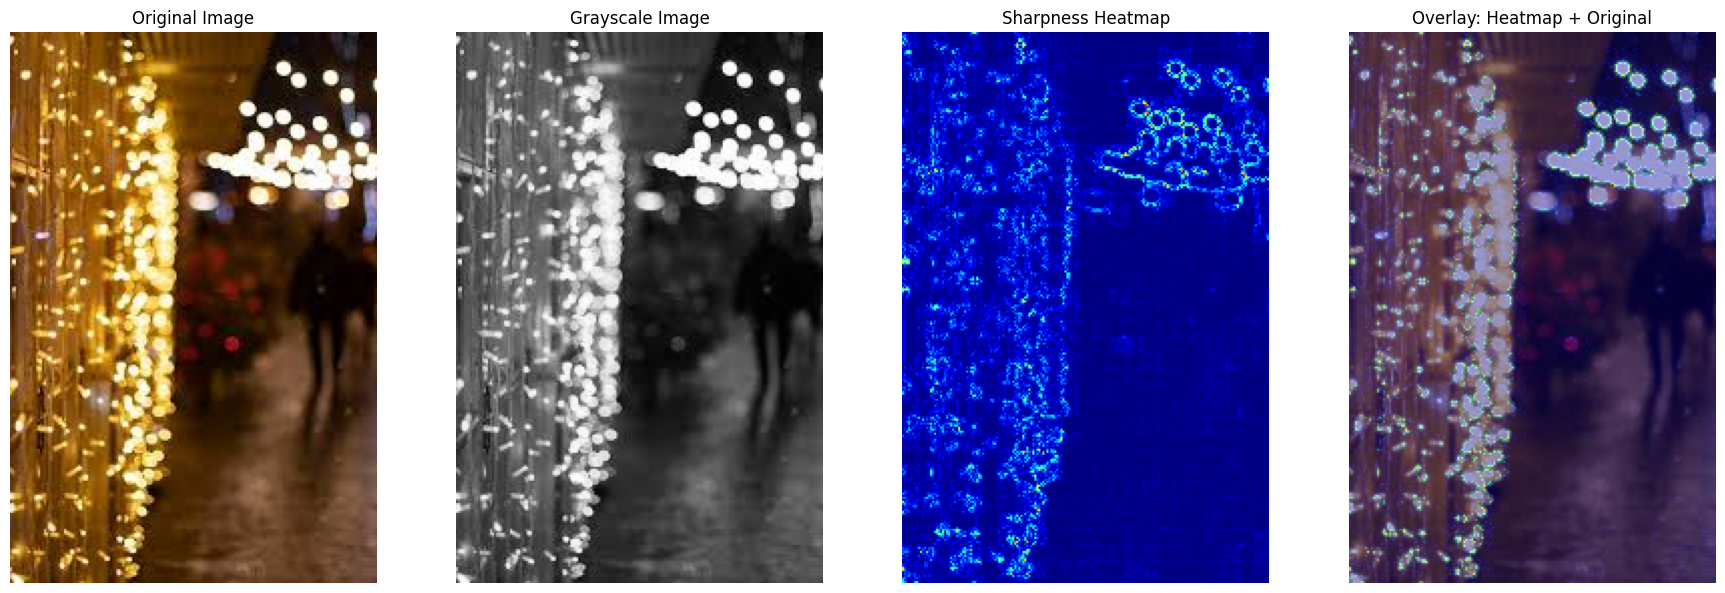

Global Sharpness Variance (higher = sharper): 2511.41


In [6]:
file_name = "6.jpeg"  # Replace with any image path
sharpness_map, heatmap, overlay = create_sharpness_heatmap(file_name, colormap='JET', alpha=0.4)